In [66]:
from top2vec import Top2Vec
from gensim.models.coherencemodel import CoherenceModel
import os
import pandas as pd
from nltk.tokenize import word_tokenize

import gensim.corpora as corpora

In [67]:
import os
import pandas as pd

In [68]:
from utils.filemanagement import load_from_file, write_topics_file, get_project_root

model_type="top2vec"
model_name="Top2Vec"
data_type="np_mini_basic"
embedding_model = "preliminary"
file_name=f"{model_type}_{embedding_model}_{data_type}"
folder_path_data =f"preprocessed_data"
file_name_data = f"{data_type}.csv"


folder_name = f"Preliminary-experiment/models/{model_type}"
ROOT_PATH = get_project_root()
file_path = os.path.join(ROOT_PATH,folder_name,file_name)

folder_path_word_cloud = f"preprocessed_data/wordclouds/preliminary/{file_name}"
folder_name = f"Preliminary-experiment/models/{model_type}"
random_sample = False
seed = 42
df = load_from_file(folder_path_data,file_name_data)

data = df.text.values.tolist()
new_data = []
for item in data:
    new_data.append(str(item))

In [69]:
topic_model = None

try:
    topic_model = Top2Vec.load(file_path)
except:
    topic_model = Top2Vec(documents=new_data)


In [70]:
topic_model.save(file_path)

In [71]:
print(topic_model.embedding_model)

doc2vec


In [72]:
num_topics = topic_model.get_num_topics()
print(num_topics)

2


In [73]:
topic_sizes, topic_nums = topic_model.get_topic_sizes()

In [74]:
topic_words, word_scores, topic_nums = topic_model.get_topics(num_topics)

In [75]:
topic_word_scores = [dict(zip(topic_words[i][:], word_scores[i])) for i in topic_nums]

In [76]:
for i in range(num_topics):
    print("\n", i)
    print(topic_word_scores[i])



 0
{'man': 0.43397596, 'jeg': 0.4160495, 'saken': 0.41535494, 'ikke': 0.39493203, 'arbeiderpartiet': 0.38854212, 'være': 0.38528562, 'bare': 0.3831452, 'kommet': 0.3822031, 'en': 0.3792373, 'synes': 0.3785837, 'noen': 0.37761635, 'endringer': 0.3639128, 'de': 0.35806572, 'et': 0.35772577, 'mener': 0.3572963, 'takker': 0.35545257, 'ligger': 0.35541484, 'innstillingen': 0.35169923, 'regjeringen': 0.35156935, 'hvert': 0.35103524, 'kommunene': 0.35009542, 'dem': 0.35001555, 'se': 0.34931675, 'sier': 0.34906572, 'flertall': 0.3452367, 'kommer': 0.3441018, 'egentlig': 0.34217855, 'gjelder': 0.33823314, 'hvordan': 0.33737525, 'noe': 0.33596623, 'allerede': 0.3355308, 'disse': 0.33408493, 'gjør': 0.33372754, 'virksomhet': 0.33033106, 'norge': 0.33006975, 'behandlingen': 0.33006456, 'vært': 0.32733265, 'flere': 0.32595918, 'selvfølgelig': 0.32463196, 'innenfor': 0.32313555, 'hele': 0.3216466, 'mer': 0.32060075, 'ønsker': 0.32048914, 'regner': 0.3200534, 'hva': 0.31911322, 'flertallet': 0.31862

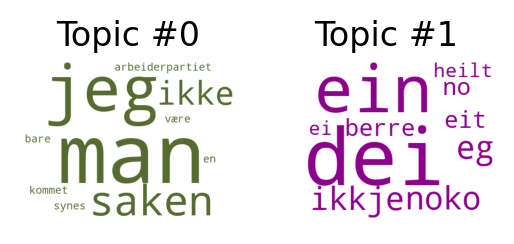

In [77]:
from utils.tables_and_plots import display_n_wordclouds

wordcloud = display_n_wordclouds(topic_word_scores, f"{model_name}-{embedding_model}: {data_type}",num_topics, dpi=200)


In [78]:
from utils.tables_and_plots import create_wordcloud


wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud"))
file_name_model = "wordcloud"
for i in range(num_topics):
    topic_wordcloud = create_wordcloud(topic_word_scores[i])
    topic_wordcloud.to_file(os.path.join(ROOT_PATH, folder_path_word_cloud, str(file_name_model + f"_{i}.png")))

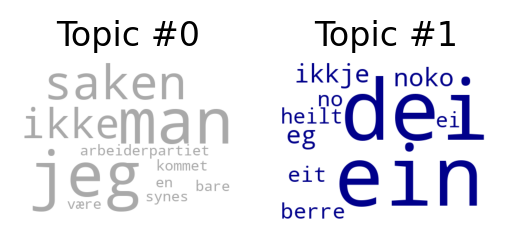

In [79]:
from utils.filemanagement import make_excerpt_wordcloud


excerpt_wordcloud = make_excerpt_wordcloud(topic_word_scores,num_topics,f"Sample from {model_name}-{embedding_model}: {data_type}",random_sample=random_sample,seed=seed)

excerpt_wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud_sample"),bbox_inches="tight")

In [80]:
from utils.filemanagement import write_topics_file

topic_words_numbered = [(i, list(topic_words[i])) for i in range(num_topics)]

folder_path_topics = r"preprocessed_data/results"


write_topics_file(folder_path_topics, file_name, topic_words_numbered)

In [81]:
from utils.filemanagement import load_model_topics

folder_path_topics = r"preprocessed_data/results"

loaded_topics = load_model_topics(folder_path_topics, file_name)

In [82]:
folder_path_frequencies = r"preprocessed_data/stats"
file_name_co_frequencies = f"{data_type}_co_freq"
file_name_frequencies=f"{data_type}_freq"

In [83]:
from utils.filemanagement import load_word_frequencies

word_frequencies = load_word_frequencies(folder_path_frequencies, file_name_frequencies)

In [84]:
from utils.filemanagement import load_zipped_word_co_frequencies

word_co_frequencies = load_zipped_word_co_frequencies(folder_path_frequencies,file_name_co_frequencies)

In [85]:
from utils.stats import compute_metrics

coherence, diversity = compute_metrics(
    loaded_topics.values(), word_frequencies, word_co_frequencies, 10)

10
('jeg', 'man') wordtuple
('jeg', 'man') wordup
39129.0 over
71713213.0 under
-10.839785000948003 -15.255950620034112 0.7105283224182176 ('jeg', 'man') 39129 6539 10967
('man', 'saken') wordtuple
('man', 'saken') wordup
2556.0 over
4662307.0 under
-10.832940453443513 -11.319672120946995 0.95700125743017 ('man', 'saken') 2556 6539 713
('ikke', 'man') wordtuple
('ikke', 'man') wordup
43636.0 over
69666506.0 under
-10.640730634383228 -15.413231239124542 0.6903633942357964 ('ikke', 'man') 43636 6539 10654
('arbeiderpartiet', 'man') wordtuple
('arbeiderpartiet', 'man') wordup
2549.0 over
4603456.0 under
-10.818570268561716 -11.315715658022203 0.9560659348038638 ('arbeiderpartiet', 'man') 2549 6539 704
('man', 'være') wordtuple
('man', 'være') wordup
13921.0 over
22958429.0 under
-10.687545359928754 -13.76497522889862 0.7764304099502471 ('man', 'være') 13921 6539 3511
('bare', 'man') wordtuple
('bare', 'man') wordup
5464.0 over
9049976.0 under
-10.693740767293253 -12.41574176829009 0.86130

In [86]:
from nltk import word_tokenize
from utils.config import use_pmi
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
if not use_pmi:
    corpus_tokenized = []
    for item in new_data:
        word_tokens = word_tokenize(item)
        corpus_tokenized.append(word_tokens)

    dct = Dictionary(corpus_tokenized)
    inp = list(loaded_topics.values())


    cm = CoherenceModel(topics=inp, texts = corpus_tokenized, dictionary=dct, coherence='c_npmi')
    coherence2 = cm.get_coherence()  # get coherence value
    print(coherence2)

det var spesielt det representanten harald tom nesvik sa som gjorde at jeg bad om ordet det er også naturlig å kommentere noe av det sonja sjøli sa jeg synes at de betraktningene som begge representantene kom med er veldig unyanserte man framstiller det som om regjeringen og de tre regjeringspartiene generelt er motstandere av alt som har med private tjenester å gjøre mens opposisjonen og da spesielt høyre og fremskrittspartiet er veldig for det det er et bilde som stemmer dårlig med virkeligheten da man innførte fastlegeordningen ble den på mange måter drevet gjennom av arbeiderpartiet og sv i utgangspunktet hadde man kommuneleger som var fast ansatt i mange kommuner så ble de privatpraktiserende selvstendig næringsdrivende og fikk arbeidsgiveransvar hvis man ser på avtaler som er inngått med privatpraktiserende spesialister ser man at det ikke var høyre og fremskrittspartiet som drev gjennom at man burde utnytte den kapasiteten  det var i all hovedsak sv og arbeiderpartiet og også fy

In [87]:
print(coherence)
print(loaded_topics.values())
print(diversity)

0.08001947581049176
dict_values([['man', 'jeg', 'saken', 'ikke', 'arbeiderpartiet', 'være', 'bare', 'kommet', 'en', 'synes', 'noen', 'endringer', 'de', 'et', 'mener', 'takker', 'ligger', 'innstillingen', 'regjeringen', 'hvert', 'kommunene', 'dem', 'se', 'sier', 'flertall', 'kommer', 'egentlig', 'gjelder', 'hvordan', 'noe', 'allerede', 'disse', 'gjør', 'virksomhet', 'norge', 'behandlingen', 'vært', 'flere', 'selvfølgelig', 'innenfor', 'hele', 'mer', 'ønsker', 'regner', 'hva', 'flertallet', 'pasienter', 'hun', 'omrader', 'talerstolen'], ['dei', 'ein', 'ikkje', 'eg', 'noko', 'berre', 'no', 'eit', 'heilt', 'ei', 'vere', 'ligg', 'kome', 'nokre', 'gjere', 'kva', 'gjer', 'seie', 'noreg', 'vore', 'meir', 'synest', 'sja', 'fleire', 'vidare', 'mykje', 'korleis', 'desse', 'sjølv', 'nokon', 'kjem', 'trur', 'leggje', 'same', 'meiner', 'betre', 'tidlegare', 'gjeld', 'treng', 'viktigaste', 'tek', 'veit', 'heile', 'ho', 'vert', 'innanfor', 'anna', 'ønskjer', 'sidan', 'sjølvsagt']])
1.0


In [88]:
# Check the stats for the dataset after running basic pipeline
from tabulate import tabulate
import csv
models = [file_name for i in range(0, 2)]
metrics = ["coherence" if i < 1 else "diversity" for i in range(0, 2)]
values = [
    coherence,
    diversity
    ]

stats = [models, metrics, values]
stats_tabulate = list(zip(*stats))
print(tabulate(stats_tabulate, headers=["Model", "Metric", "Value"], tablefmt="fancy_grid"))

╒═══════════════════════════════════╤═══════════╤═══════════╕
│ Model                             │ Metric    │     Value │
╞═══════════════════════════════════╪═══════════╪═══════════╡
│ top2vec_preliminary_np_mini_basic │ coherence │ 0.0800195 │
├───────────────────────────────────┼───────────┼───────────┤
│ top2vec_preliminary_np_mini_basic │ diversity │ 1         │
╘═══════════════════════════════════╧═══════════╧═══════════╛


In [89]:
# Save all topic stats to file

topic_stats_folder_path = fr"preprocessed_data/metrics/{model_type}"
topic_stats_file_name = f"{file_name}_stats"
topic_stats_path = os.path.join(ROOT_PATH,topic_stats_folder_path, topic_stats_file_name + r".csv")

TOPIC_STAT = "Topic stat"
VALUE = "Value"

with open(topic_stats_path, encoding="utf-8", mode="w", newline="") as topic_stats_file:
    header = [TOPIC_STAT, VALUE]
    writer = csv.DictWriter(topic_stats_file, fieldnames=header, delimiter=";")
    writer.writeheader()
    writer.writerow({TOPIC_STAT : "Coherence", VALUE : coherence})
    writer.writerow({TOPIC_STAT : "Diversity", VALUE : diversity})